In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `loss` mode scenario of `plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.insert(0, '../..')
from batchflow import plot

In [3]:
# Generate sample data

x = np.linspace(1, 100, 1000)

oscillation = lambda x: np.sin(x) / x + np.random.normal(scale=0.1, size=len(x))

y0 = -np.log(x) * .4 + oscillation(x)

To display a single curve use `plot_loss`, since it has nicer defaults for loss ploting that `plot`, which is a more general-purpose function.

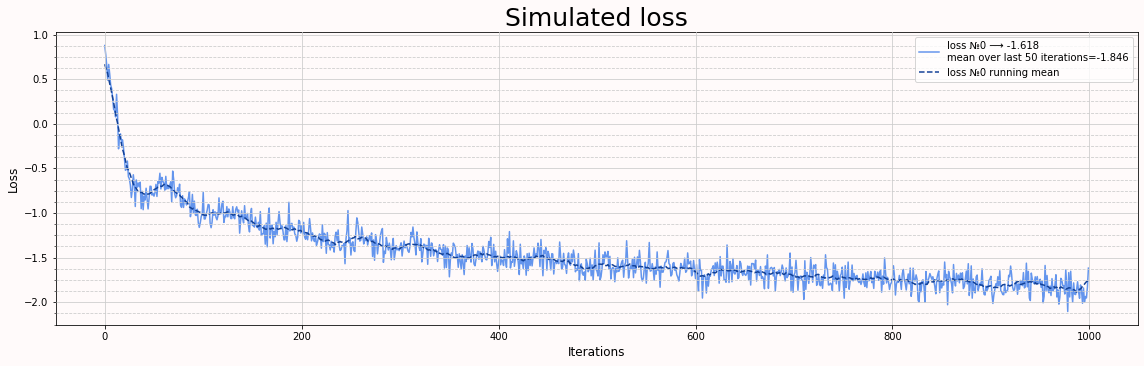

In [4]:
plot(y0,
     mode='loss',
     title='Simulated loss' 
    )

To change rolling mean window size specify it in `window` parameter.

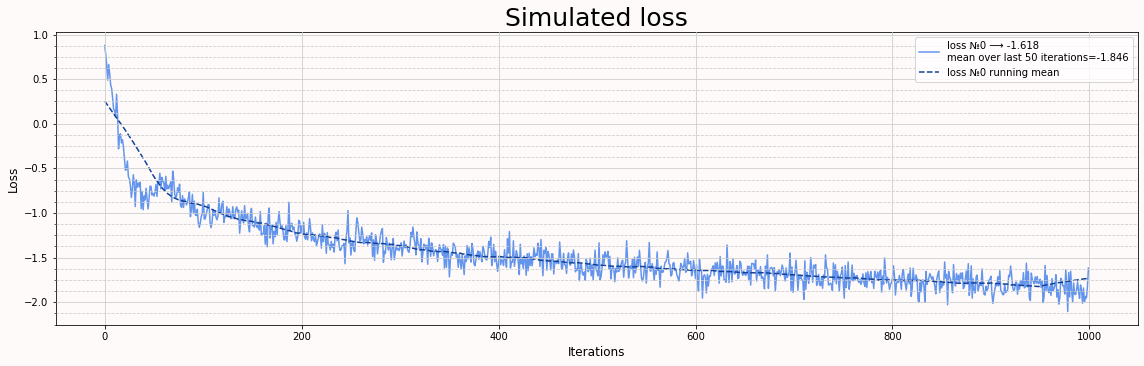

In [5]:
plot(y0,
     mode='loss',
     title='Simulated loss',
     window=100
    )

To modify mean of last `n` iterations (displayed in legend window), address `final_window` parameter.

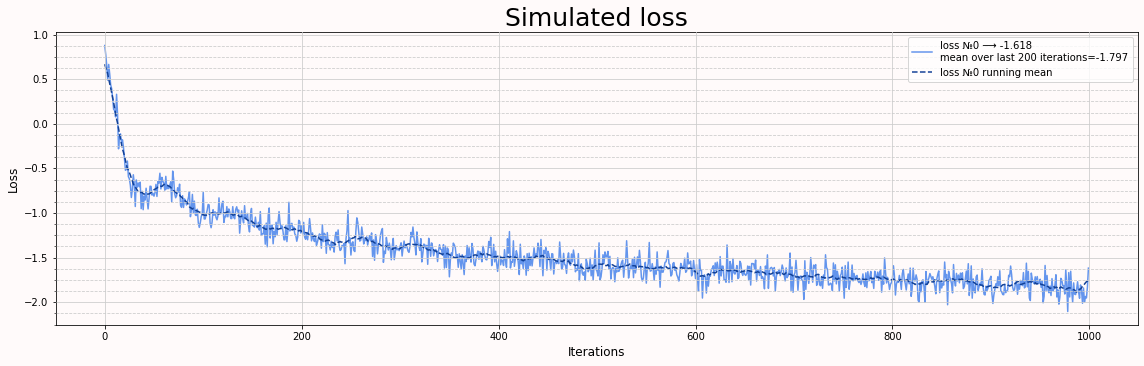

In [6]:
plot(y0,
     mode='loss',
     title='Simulated loss',
     final_window=200
    )

One migh wish to display several losses simultaneously.

In [7]:
y1 = -np.log(x) * .6 + oscillation(x)

To achieve that provide arrays in a list.

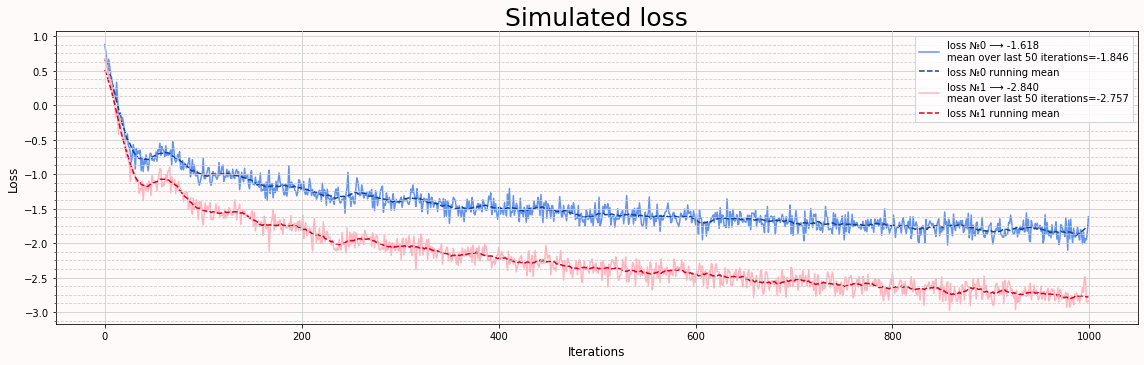

In [8]:
plot([y0, y1],
     mode='loss',
     title='Simulated loss',
    )

To display curves on separate plots use `combine='separate'`.

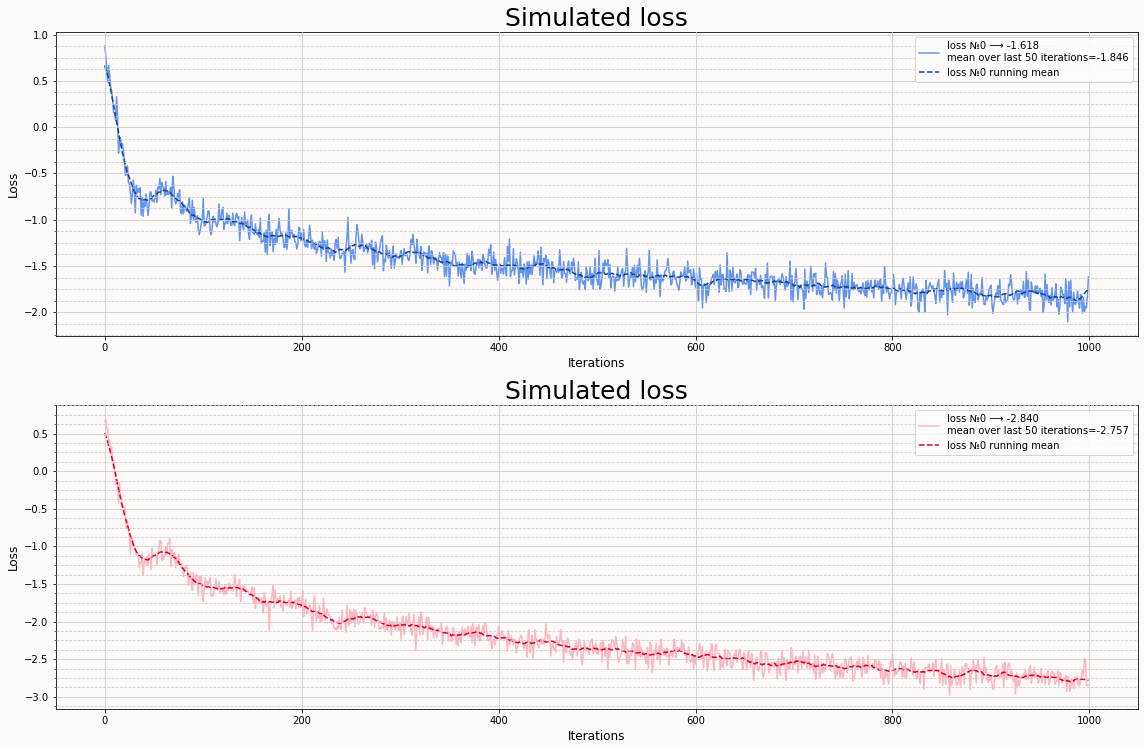

In [9]:
plot([y0, y1],
     mode='loss',
     combine='separate',
     title='Simulated loss',
    )

To display curves in ``'mixed'`` manner, i.e. with some curves overlaid and some displayed separately, use nested lists of arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

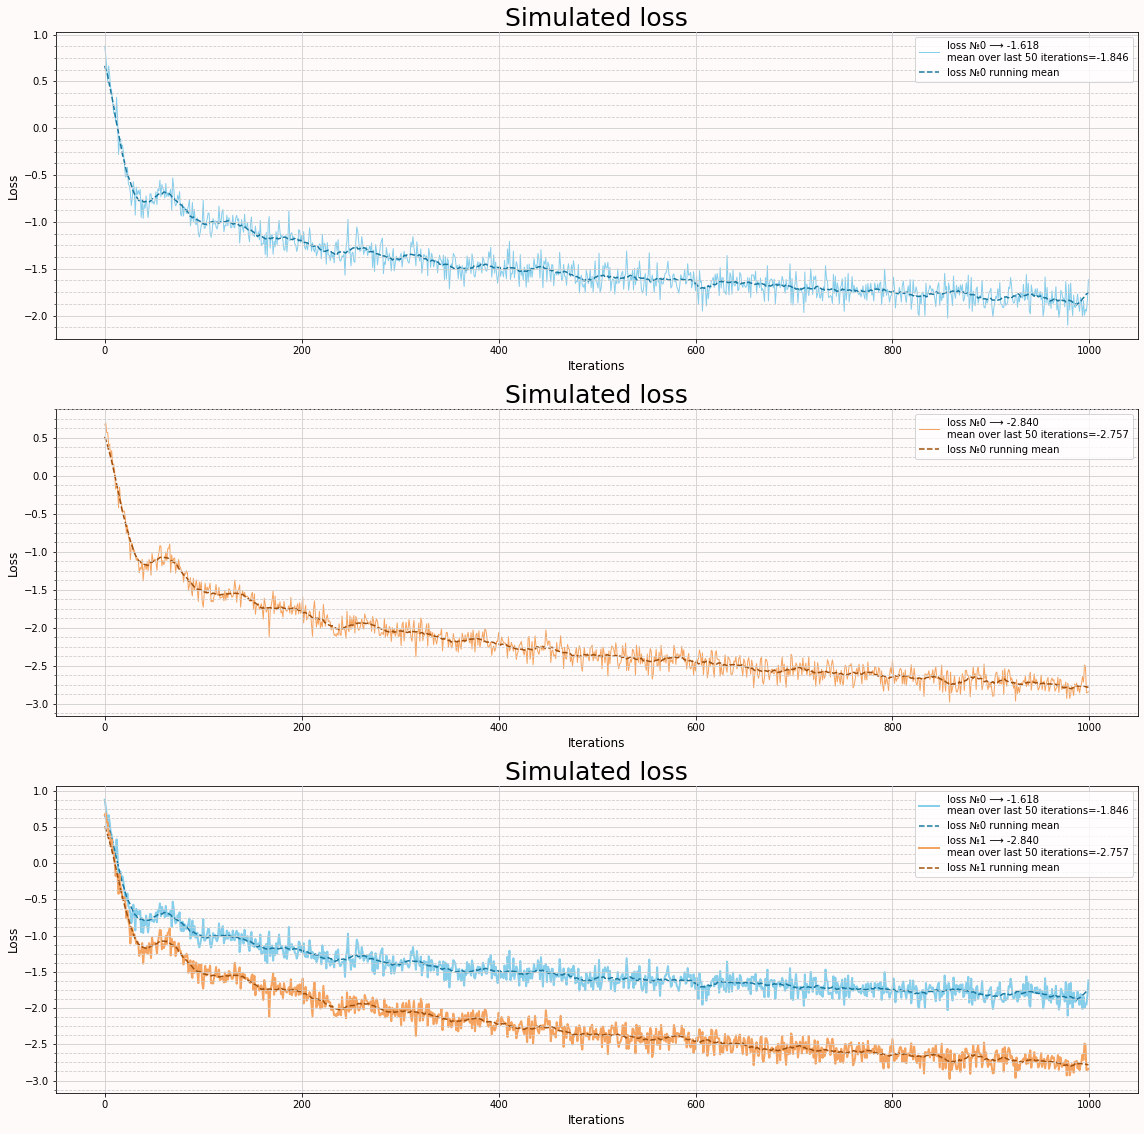

In [10]:
plot([y0, y1, [y0, y1]],
     mode='loss',
     title='Simulated loss',
     color=['skyblue', 'sandybrown', ['skyblue', 'sandybrown']],
     linewidth=[1, 1, 2],
    )

### Display learning rate alongside with loss values

To display learning rate on the same plot with the loss simply provided it packed in the same tuple.

Since learning rate often decays exponentially, it might be usefull to log corresponding axis.

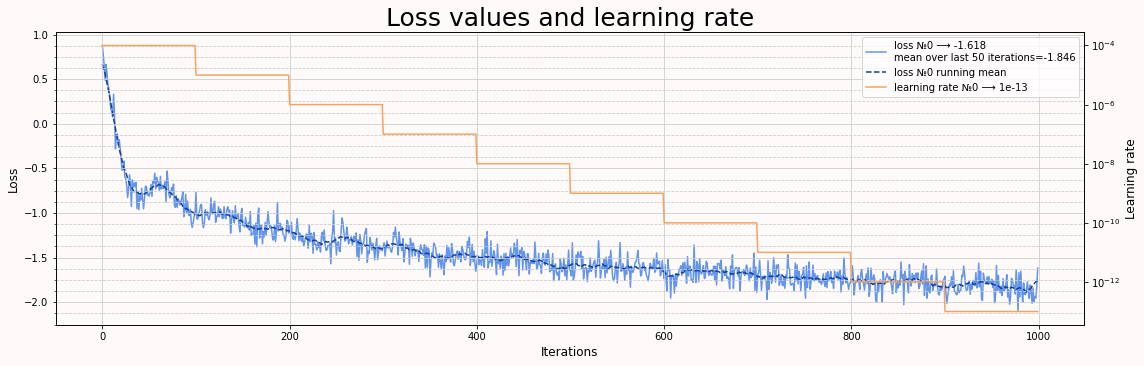

In [11]:
lr = np.full(len(x), 1e-3)
for i in range(0, len(x), 100):
    lr[i:] /= 10
    
plot((y0, lr),
     mode='loss',
     log_lr=True)